# Predicting Survivors

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

Checking the Head

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking for unique values, 
which will discovers the categorical and continuous variables in the dataset

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

The Survived, Pclass, Sex, Embarked are most easily identified as categorical variables, while SibSp, Parch too are categorical

# Exploratory Data Analysis

### Checking for missing values

for this, we will try using heatmap from seaborn

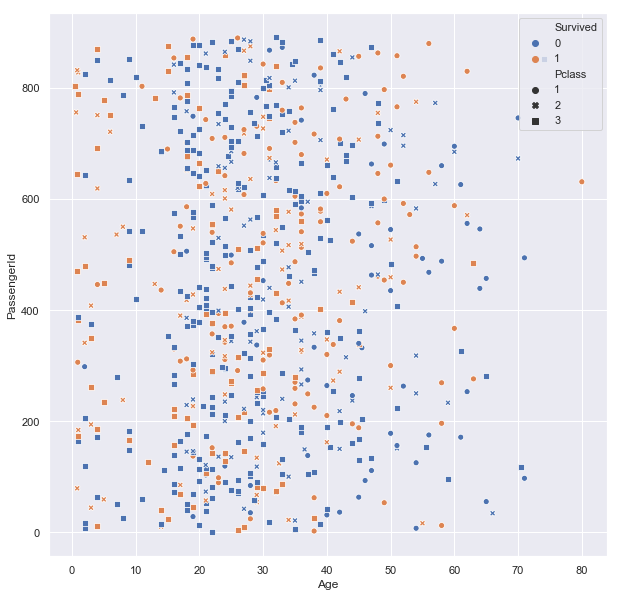

In [7]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,10))  
sns.scatterplot(y='PassengerId',x='Age', data=df, hue='Survived', style='Pclass')

Above is a scatter plot, which shows the survived in blue and dead in orange. Also, the shape of the datapoints shows the passenger class. 

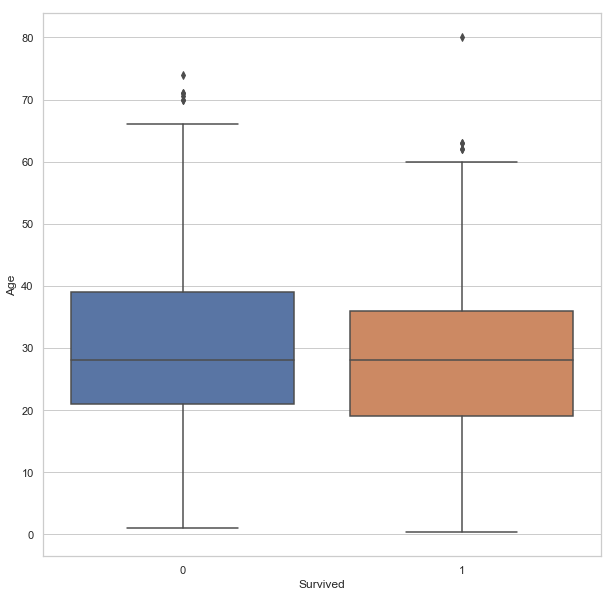

In [8]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y=df['Age'],x=df['Survived'], ax=ax, dodge=False)

Above box Plot shows the survived/not survived passengers, with their age, minimum, mean, maximum and outliers. 

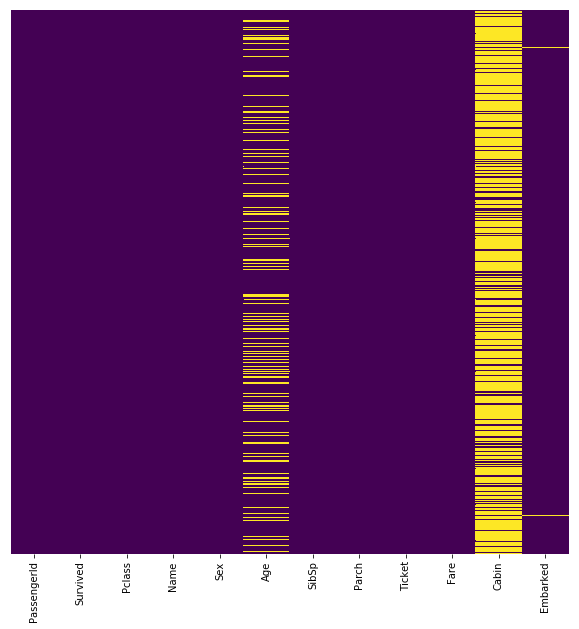

In [5]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The data for Age, Cabin and Embarked is missing, let's see the percentage of missing data

In [6]:
(df.isna().sum() / len(df))* 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

We identify that Cabin information is mostly missing, and it won't be a good choice to even include the Cabin information in our features to predict Survivability.
Age feature on the other hand, has roughly 20% of data missing, and we can somehow adjust or fill up the gap for the Age field

Creating a histogram of Age

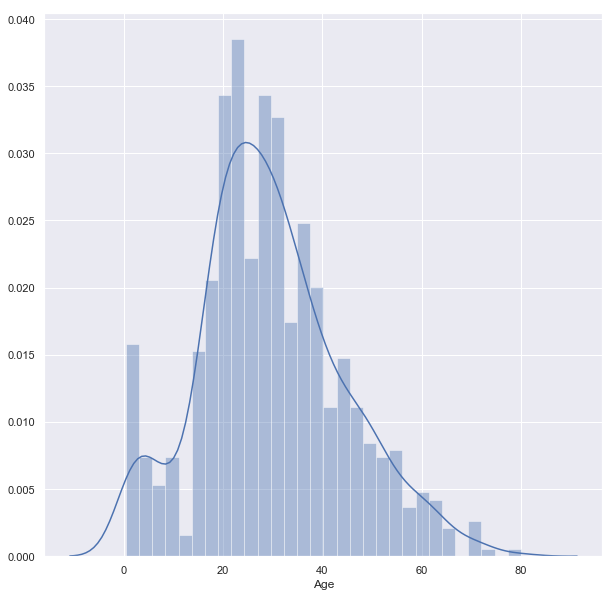

In [7]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,10))  
sns.distplot(df['Age'].dropna(), bins = 30, ax=ax, )

from the above plot, we can see that the concentration of ages are between 20 to 40. But let's further analyze the age by using the describe parameter

In [8]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

So the average age is about 28, now for the missing 20% of the Age we've to somehow devise a formula which will imput the age based on the values. We also will have to consider the Sex or other features, but for that we will need to continue our analysis.

Let's also view the column called SibSp which refers to the siblings of the passengers.

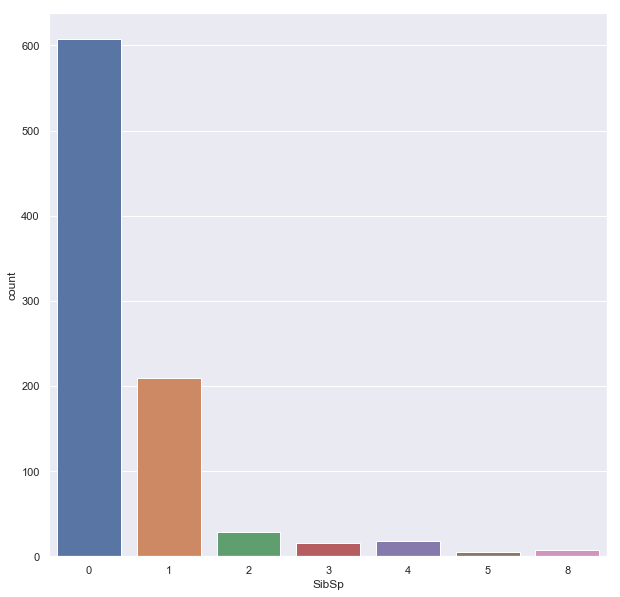

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.countplot(x='SibSp', data=df, ax=ax)

The plot shows, that there were more single passengers than those who were travelling with family. and there were around 200+ people who had one sibling. We can guess that, it would be spouse.

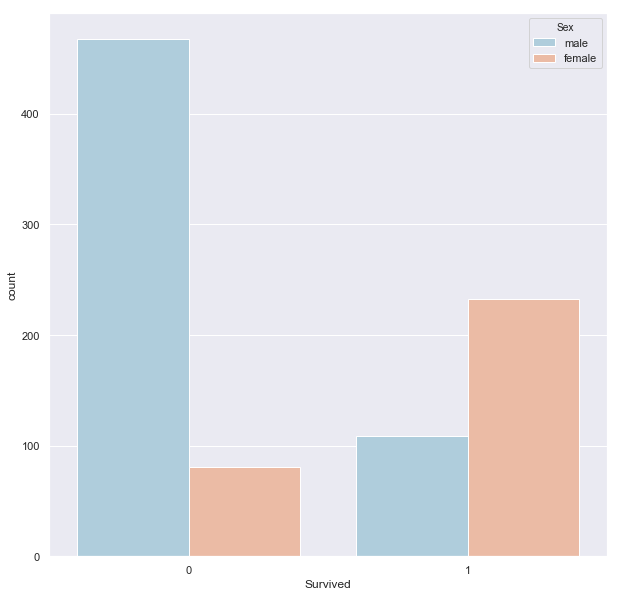

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.countplot(x='Survived', data=df, hue='Sex', palette='RdBu_r', ax=ax) 

This account shows that, there were near to 500 male passengers, who lost their lives, while around 80 females who died. So in the surviros, obviously female ratio is in bigger number. 


Let's also see the survivability from a different perspective. That is the passenger class.

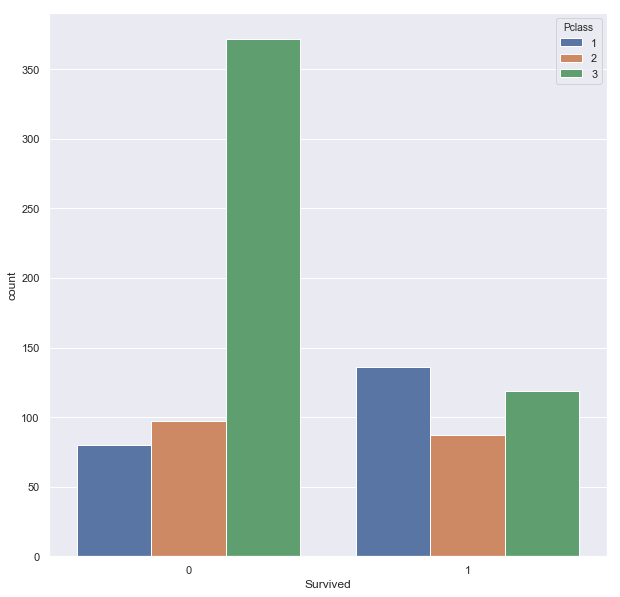

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.countplot(x='Survived', hue='Pclass', data=df, ax=ax)

Exploring further about the fare

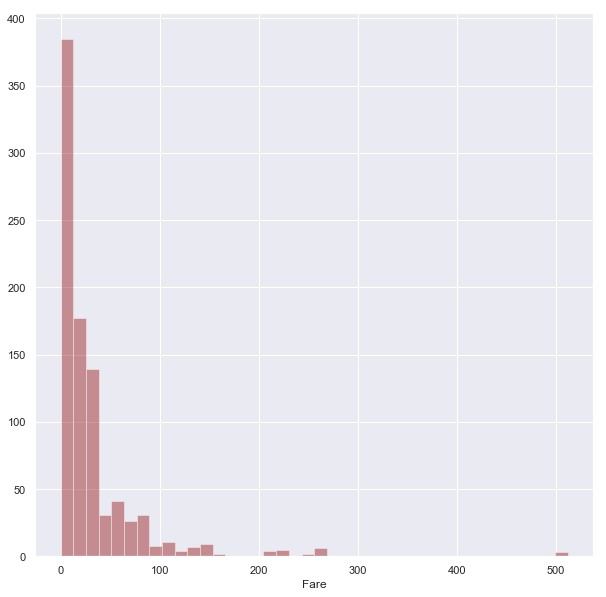

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['Fare'].dropna(), kde=False, bins=40, color='darkred')

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
df['Fare'].iplot(kind='hist', bins=30, color='red')

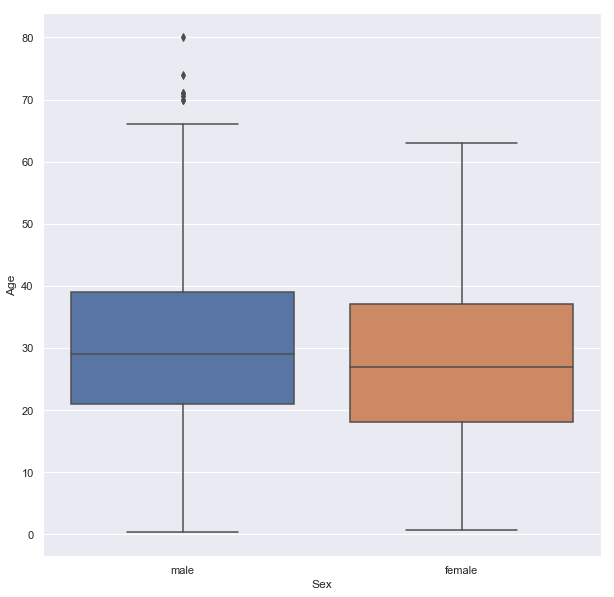

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(y=df['Age'],x=df['Sex'])

The average age for male passengers is 30 and that of female is 27

# Data Cleansing

As part of Data Cleansing, let's first take care of the missing data for Age

One way to add the missing data is to drop the age column where the data is null. Another way is to fill the missing data by the mean value, this is called imputation.
Let's see the average age of each passenger by class. 

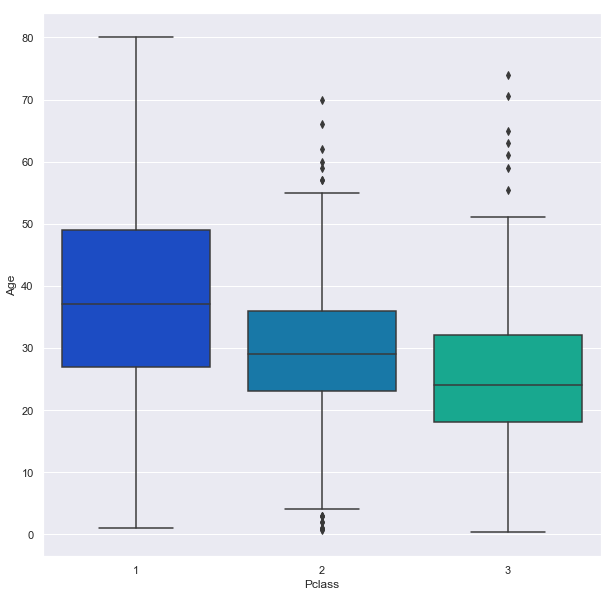

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age', data=df, palette='winter', ax=ax)

We see now, the higher class passengers are older, with average age of around 37, second class has average age of 29, and the third class with age of 24.
We will create a function which will now impute the ages and fill the null values.

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age      

Applying the function 

In [18]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

Let's try the heatmap again to see the results

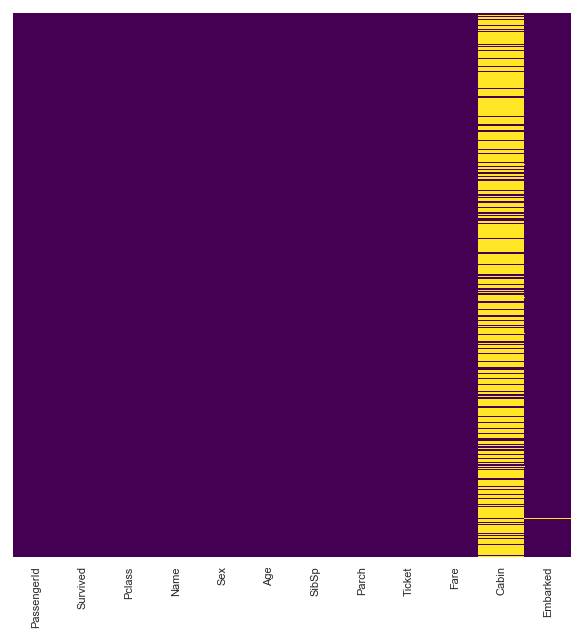

In [19]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Let's now take care of the Cabin and Embarked column. Since Cabin field, is 70% null, it is best to drop the field. While the one null value which is for Embarked, let us also drop that.

In [20]:
df.drop('Cabin', axis=1, inplace=True)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
df.dropna(inplace=True)

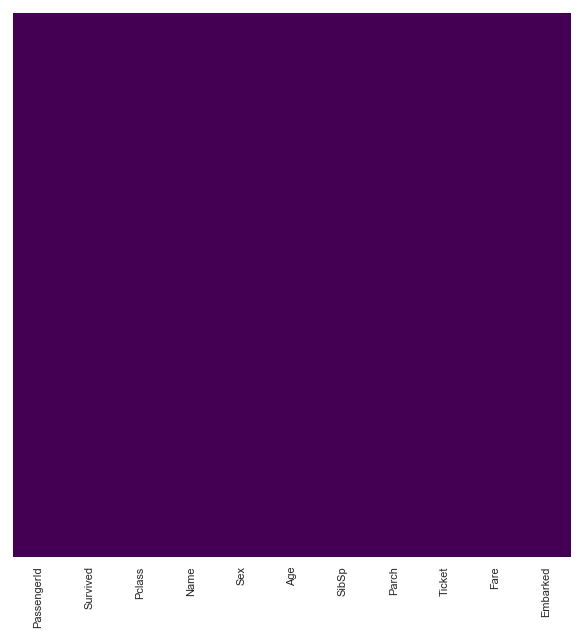

In [23]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Converting the Categorical Features

The Logistic regression algorithm takes the numerical input, while we've some features in our data set which are not numerical. We will use pandas library to convert those to numerical values, so that those would be understood by the algorithm. 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [26]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [27]:
df = pd.concat([df,sex,embark],axis=1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now the dataset is ready to be fed to the Logistic Regression algorithm, as we've only numeric data. 

# Building the Logistic Regression Model

We will split the data into X and y and train our model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training the Model

In [31]:
model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predictions = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [35]:
print(confusion_matrix(y_test, predictions))

[[149  14]
 [ 33  71]]
